In [4]:
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available()

2.7.0


True

In [5]:
import numpy as np
import pandas as pd
import os
import cv2

from math import ceil
from numba import njit, prange
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array
from pyts.approximation import PiecewiseAggregateApproximation
from keras.utils import np_utils

In [6]:
# npz import 

Welding_data = np.load('E:/Result/ver.3.21/RP/RP.npz')

X_data = Welding_data['X_data']
y_data = Welding_data['y_data']
i_data = Welding_data['i_data']

Welding_data.close()

In [7]:
seed = 7
np.random.seed()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X_data, y_data, i_data, test_size= 0.2, shuffle= True, random_state= seed)

In [9]:
inputs = np.concatenate((X_train, X_test))
targets = np.concatenate((y_train, y_test))
index = np.concatenate((i_train, i_test))

In [10]:
print(inputs.shape)
print(targets.shape)
print(index.shape)

(3000, 300, 300, 2)
(3000,)
(3000,)


In [11]:
targets = np_utils.to_categorical(targets)

In [12]:
print(targets.shape)

(3000, 3)


In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits= 10, shuffle= True, random_state= seed)

test= []
train= []
test_= []
train_= []

for train, test in kfold.split(inputs, targets):
    print('-----------------------------')
    print(len(test))
    print(len(train))
    for i in zip(test):
        test_.append(i)
    for i in zip(train):
        train_.append(i)

-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700
-----------------------------
300
2700


In [14]:
train= train[0:2700]
train= np.reshape(train, 2700)
test= test_[0:300]
test= np.reshape(test, 300)

In [15]:
print(inputs[train].shape)
print(targets[test].shape)

(2700, 300, 300, 2)
(300, 3)


In [16]:
from keras.models import load_model

with tf.device('/gpu:0'):
    model = load_model('E:/Result/ver.3.21/RP/weight/RP_1.h5')
    y_predict = model.predict(inputs[test])
    print(y_predict.shape)
    y_predict_Reshape = np.reshape(y_predict, 900)
    
    list_y_predict_ = []
    
    for j in range(len(y_predict_Reshape)):
        y_predict_Round = round(y_predict_Reshape[j], 0)
        y_predict_int = int(y_predict_Round)
        list_y_predict_.append(y_predict_int)
        
    y_predict = np.array(list_y_predict_)
    print(y_predict.shape)

(300, 3)
(900,)


In [17]:
y_predict = np.reshape(y_predict, (300,3))
y_predict = np.argmax(y_predict, axis= 1)

In [18]:
targets = np.argmax(targets[test], axis= 1)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Acc = accuracy_score(targets, y_predict)
print(Acc)

recall = recall_score(targets, y_predict, average= "macro")
print(recall)

pre = precision_score(targets, y_predict, average= "macro")
print(pre)

f1 = f1_score(targets, y_predict, average= "macro")
print(f1)

0.9866666666666667
0.9869696969696969
0.9876700680272109
0.9872599872599873


In [20]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, Recall, fscore, support = score(targets, y_predict)

print('Precision : {}'.format(precision))
print('Recall : {}'.format(Recall))
print('f_score : {}'.format(fscore))
print('Accuracy : {}'.format(support))

Precision : [1.         0.97321429 0.98979592]
Recall : [1.         0.99090909 0.97      ]
f_score : [1.         0.98198198 0.97979798]
Accuracy : [ 90 110 100]


In [21]:
X_incorrect= []
X_correct= []
y_incorrect= []
i_incorrect= []
y_correct= []
i_correct= []
y_pre_co= []
y_pre_inco= []

In [22]:
print(inputs[test])

[[[[0.0000000e+00 0.0000000e+00]
   [4.9575111e+01 2.4160001e-01]
   [1.1738263e+02 1.9266371e+01]
   ...
   [4.6353859e+01 1.4173999e-01]
   [4.3454731e+01 1.7942500e+00]
   [3.8010799e+01 1.9263300e+00]]

  [[4.9575111e+01 2.4160001e-01]
   [0.0000000e+00 0.0000000e+00]
   [6.7807518e+01 1.9507971e+01]
   ...
   [3.2212501e+00 9.9859998e-02]
   [6.1203799e+00 1.5526500e+00]
   [1.1564310e+01 1.6847301e+00]]

  [[1.1738263e+02 1.9266371e+01]
   [6.7807518e+01 1.9507971e+01]
   [0.0000000e+00 0.0000000e+00]
   ...
   [7.1028770e+01 1.9408110e+01]
   [7.3927902e+01 2.1060619e+01]
   [7.9371834e+01 2.1192699e+01]]

  ...

  [[4.6353859e+01 1.4173999e-01]
   [3.2212501e+00 9.9859998e-02]
   [7.1028770e+01 1.9408110e+01]
   ...
   [0.0000000e+00 0.0000000e+00]
   [2.8991301e+00 1.6525100e+00]
   [8.3430595e+00 1.7845900e+00]]

  [[4.3454731e+01 1.7942500e+00]
   [6.1203799e+00 1.5526500e+00]
   [7.3927902e+01 2.1060619e+01]
   ...
   [2.8991301e+00 1.6525100e+00]
   [0.0000000e+00 0.000000

In [23]:
print(targets)

[2 2 2 1 1 2 2 1 2 2 2 0 1 2 0 0 2 1 1 1 2 0 2 1 0 0 1 2 0 2 2 2 2 0 0 1 1
 1 2 2 0 1 2 0 1 0 1 0 2 1 1 1 0 0 0 2 1 1 1 0 0 2 0 0 1 1 2 2 0 2 1 1 2 1
 1 1 1 0 1 0 2 1 0 2 1 2 1 2 1 1 0 0 1 2 2 2 0 1 1 1 0 1 0 2 1 1 2 0 2 1 0
 0 1 2 1 2 2 1 2 2 2 2 1 0 2 0 2 2 2 1 1 1 0 0 0 1 0 1 0 2 2 2 2 0 1 1 2 2
 0 1 1 1 1 2 0 0 1 2 1 1 2 0 2 2 2 1 2 2 1 0 2 1 0 0 1 1 1 1 1 2 1 2 2 2 0
 2 0 1 0 0 0 1 1 0 0 2 0 0 2 0 2 1 1 1 1 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 1 0
 0 2 1 1 1 0 1 0 0 2 1 1 2 2 0 0 2 2 1 0 1 2 0 2 2 0 0 2 0 0 0 1 0 0 0 1 2
 2 1 2 0 2 1 2 0 0 0 2 1 1 2 0 0 1 1 2 1 0 2 1 1 0 2 2 1 1 0 1 0 0 2 2 1 1
 1 2 2 2]


In [24]:
print(index[test])

['H_999' 'H_999' 'H_999' 'P_600' 'P_724' 'H_999' 'H_999' 'P_620' 'H_999'
 'H_999' 'H_999' 'N_23' 'P_613' 'H_999' 'N_902' 'N_525' 'H_999' 'P_70'
 'P_257' 'P_678' 'H_999' 'N_515' 'H_999' 'P_342' 'N_953' 'N_211' 'P_908'
 'H_999' 'N_627' 'H_999' 'H_999' 'H_999' 'H_999' 'N_100' 'N_404' 'P_331'
 'P_441' 'P_130' 'H_999' 'H_999' 'N_164' 'P_695' 'H_999' 'N_720' 'P_665'
 'N_473' 'P_196' 'N_533' 'H_999' 'P_175' 'P_553' 'P_991' 'N_704' 'N_624'
 'N_444' 'H_999' 'P_736' 'P_619' 'P_609' 'N_226' 'N_833' 'H_999' 'N_270'
 'N_764' 'P_152' 'P_353' 'H_999' 'H_999' 'N_683' 'H_999' 'P_215' 'P_626'
 'H_999' 'P_824' 'P_20' 'P_526' 'P_538' 'N_520' 'P_995' 'N_911' 'H_999'
 'P_208' 'N_892' 'H_999' 'P_901' 'H_999' 'P_250' 'H_999' 'P_920' 'P_389'
 'N_453' 'N_710' 'P_807' 'H_999' 'H_999' 'H_999' 'N_518' 'P_395' 'P_345'
 'P_481' 'N_735' 'P_36' 'N_414' 'H_999' 'P_73' 'P_740' 'H_999' 'N_137'
 'H_999' 'P_80' 'N_313' 'N_610' 'P_850' 'H_999' 'P_622' 'H_999' 'H_999'
 'P_829' 'H_999' 'H_999' 'H_999' 'H_999' 'P_145' 'N_15' '

In [25]:
for i in range(0, len(targets)):
    if y_predict[i] != targets[i]:
        X_incorrect.append(inputs[test][i])
        y_incorrect.append(targets[i])
        i_incorrect.append(index[test][i])
        y_pre_inco.append(y_predict[i])
    else:
        X_correct.append(inputs[test][i])      
        y_correct.append(targets[i])
        i_correct.append(index[test][i])
        y_pre_co.append(y_predict[i])

In [26]:
X_incorrect = np.array(X_incorrect)
X_correct = np.array(X_correct)

In [27]:
print(X_incorrect.shape)
print(y_incorrect)
print(i_incorrect)

(4, 300, 300, 2)
[2, 2, 1, 2]
['H_999', 'H_999', 'P_500', 'H_999']


In [38]:
numb = 1

In [39]:
X_inco = X_incorrect[numb].reshape(1,300,300,2)

In [40]:
print(i_incorrect[numb])

H_999


H_999
2
1


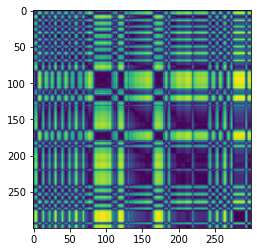

In [41]:
import matplotlib.pyplot as plt

b = X_inco.reshape(300,300,2)
b = b[:,:,0]

print(i_incorrect[numb])
print(y_incorrect[numb])
print(y_pre_inco[numb])

plt.imshow(b)

In [42]:
with tf.device('/gpu:0'):
    get_output = tf.keras.backend.function([model.layers[0].input], 
                                           [model.layers[-3].output, model.layers[-1].output])
    [conv_outputs_inco, predictions_inco] = get_output([X_inco])
    class_weights_inco = model.layers[-1].get_weights()[0]

In [43]:
output_inco = []
for num, idx in enumerate(np.argmax(predictions_inco,axis=1)):
    cam = tf.matmul(np.expand_dims(class_weights_inco[:,idx],axis = 0),
                    np.transpose(np.reshape(conv_outputs_inco[num],(9*9,1024))))
    cam = tf.keras.backend.eval(cam)
    output_inco.append(cam)

In [44]:
output_inco = np.array(output_inco)
output_inco = output_inco.reshape(9,9)
print(output_inco.shape)

(9, 9)


In [45]:
output_inco = cv2.resize(output_inco, (300,300))
img_inco = np.reshape(X_inco, (300,300,2))

large_output_inco = cv2.resize(output_inco, (300*5, 300*5), interpolation=cv2.INTER_CUBIC)
large_img_inco = cv2.resize(img_inco, (300*5, 300*5))

In [46]:
c = large_img_inco[:, :, 0]
print(c.shape)

(1500, 1500)


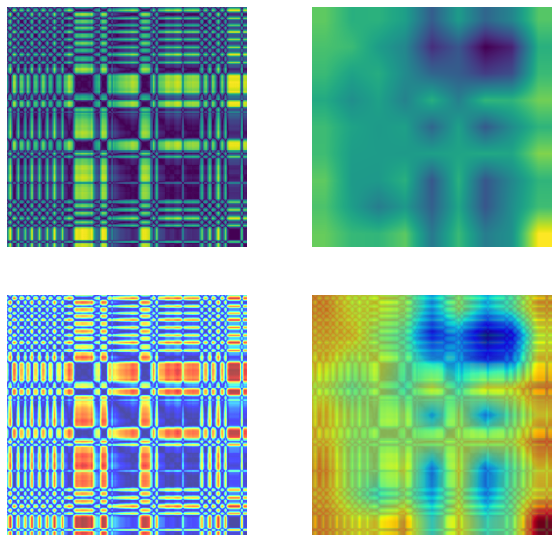

H_999


In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.imshow(b)
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(output_inco)
plt.axis('off')
'''
plt.subplot(3,2,3)
plt.imshow(c)
plt.axis('off')
'''
plt.subplot(3,2,3)
plt.imshow(c, 'jet', alpha=0.7)
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(c)
plt.imshow(large_output_inco, 'jet' ,alpha=0.7)
plt.axis('off')
plt.show()

print(i_incorrect[numb])